# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']




##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


# Analisis exploratorio de datos y Componentes de la serie

In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


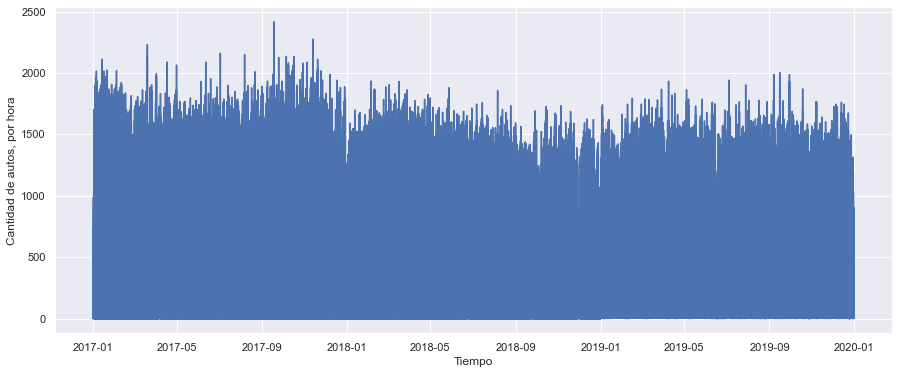

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
#plt.xlim(datetime.date(2017,1,1), datetime.date(2017,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

##### Como podemos observar el grafico no nos proporciona una imagen clara de lo que sucede

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


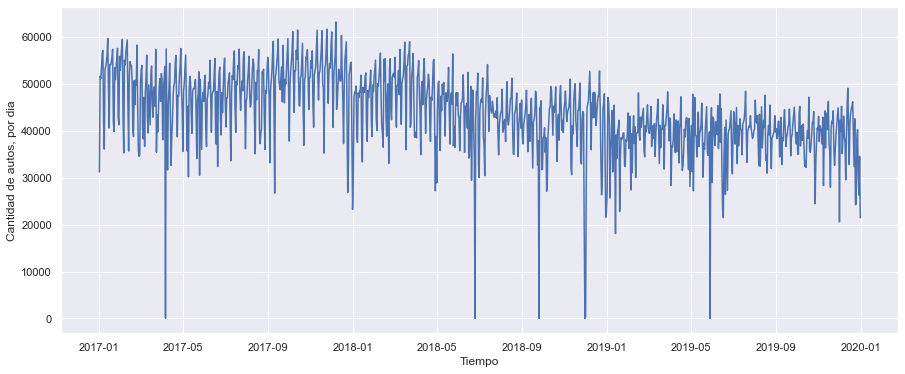

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

##### Seguimos con el mismo problema

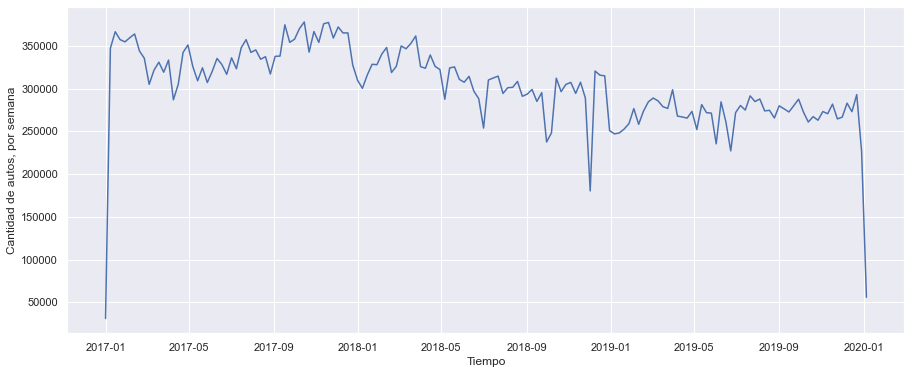

In [17]:
#Resampleamos nuestros datos para agrupar por semana, y asi tal vez lograr una visualización mas amigable
semanal = dataset.resample('W', on = 'fecha').sum()
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

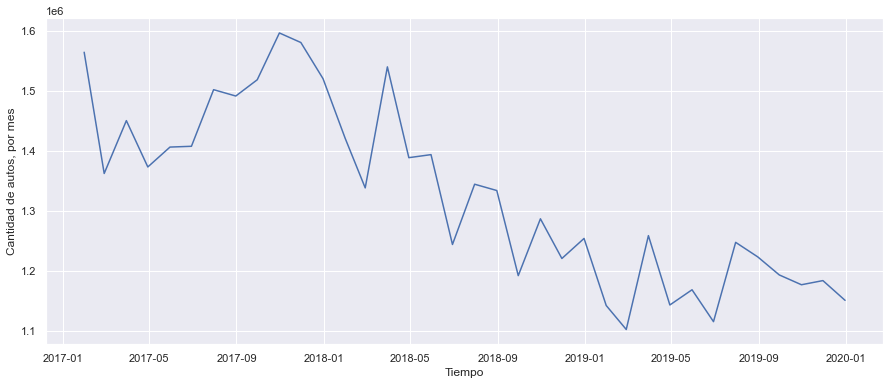

In [18]:
#Resampleamos nuestros datos para agrupar por mes, y asi tal vez lograr una visualización mas amigable
mensual = dataset.resample('M', on = 'fecha').sum()
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

##### En este caso podemos visualizar mejor la sittuacion y como primer analisis vemos que presenta una tendencia negativa desde mayo de 2018.

In [19]:
dataset.groupby(['tipo_vehiculo']).mean()

,cantidad_pasos
tipo_vehiculo,
Liviano,530.504751
Pesado,10.078154


Podemos ver que en dicha estacion circulan mayormente vehiculos livianos

In [20]:
dataset.groupby(['sentido','dia']).mean()

cantidad_pasos
sentido   dia                      
Centro    Domingo        177.295910
          Jueves         200.130886
          Lunes          188.565924
          Martes         192.934342
          Miércoles      195.626284
          Sábado         186.336499
          Viernes        211.214388
Provincia Domingo        186.020959
          Jueves         219.632759
          Lunes          204.581123
          Martes         208.051592
          Miércoles      212.849929
          Sábado         200.842431
          Viernes        224.244641

##### Como son las tendencias de los tipos de vehiculos?

In [21]:
pesado=dataset[dataset.tipo_vehiculo=='Pesado']
pesado.reset_index(drop=True,inplace=True)
semana_pesado = pesado.resample('W', on = 'fecha').sum()

liviano=dataset[dataset.tipo_vehiculo=='Liviano']
liviano.reset_index(drop=True,inplace=True)
semana_liviano = liviano.resample('W', on = 'fecha').sum()

In [22]:
ventana = int(365/52)
semanal_promedio_tendencia_pesado = semana_pesado.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia_liviano = semana_liviano.rolling(window=ventana, center = True).mean()

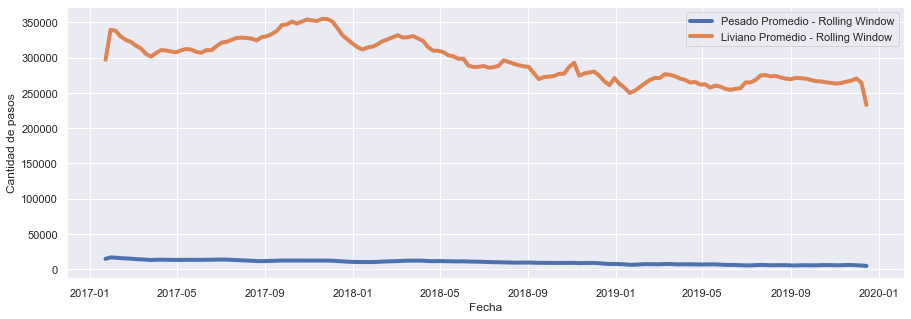

In [23]:
plt.figure(figsize = (15,5))
plt.plot(semanal_promedio_tendencia_pesado, lw = 4, label = 'Pesado Promedio - Rolling Window',)
plt.plot(semanal_promedio_tendencia_liviano, lw = 4, label = 'Liviano Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Si bien las dos descienden podemos observar que en el caso de los vehiculos pesados pareceria acercarse a 0

#### Tendencias, estacionales y residuales del trafico liviano y pesado

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

##### Vehiculos pesados 

Trafico Pesado


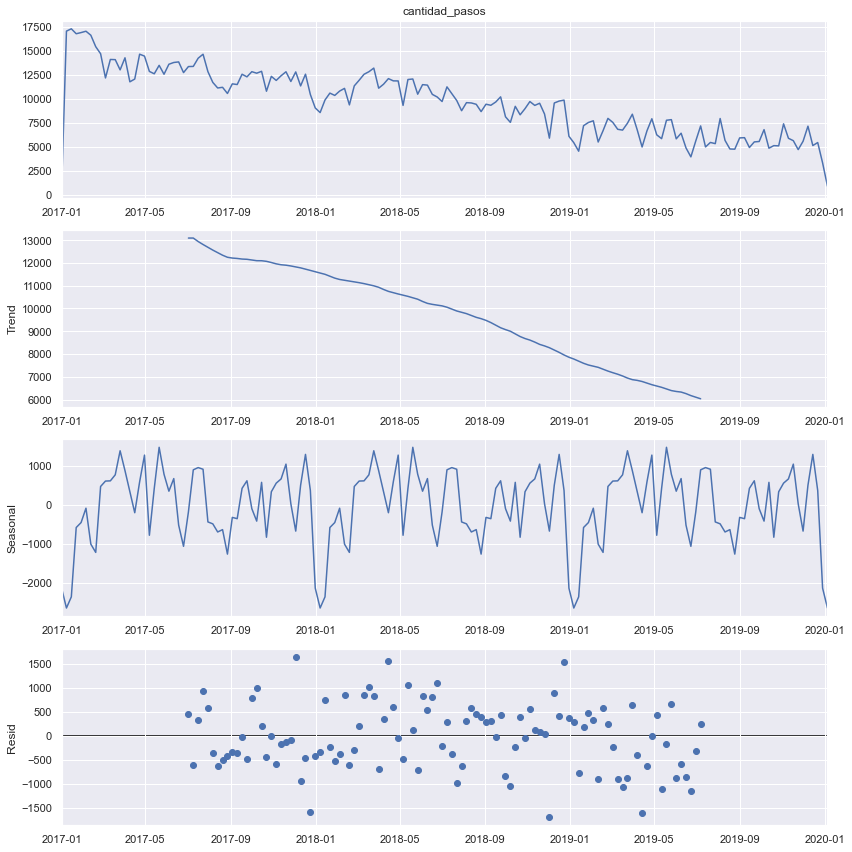

In [25]:
result1 = seasonal_decompose(semana_pesado.cantidad_pasos, model='additive')
print('Trafico Pesado')
plt.rcParams['figure.figsize'] = [12,12]
result1.plot()
plt.show()

Trafico Liviano


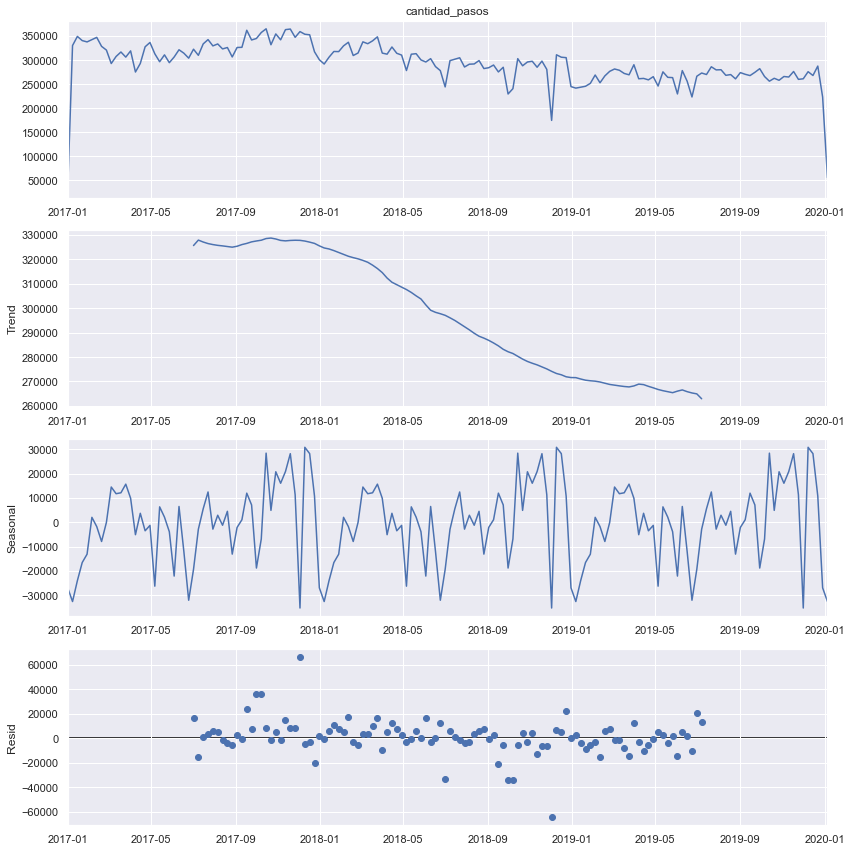

In [26]:
plt.rcParams['figure.figsize'] = [12,12]
result2 = seasonal_decompose(semana_liviano.cantidad_pasos, model='additive')
print('Trafico Liviano')
result2.plot()
plt.show()

##### Como se puede ver ambas tendencias muestran un decrecimiento constante y en el caso de los vehiculos pesados es minimo el paso. Lo que me llevo a investigar el porque y encontre que dicha estacion fue una de las que mas aumento en el periodo además se encontraba la construccion del paseo del bajo supongo que en parte el decrecimietno se debe a dichas variables

#### Vamos a realizar el analisis de la estacionalidad y tendencia

In [27]:
semanal = seasonal_decompose(semanal.cantidad_pasos, model='additive')

<Figure size 864x864 with 0 Axes>

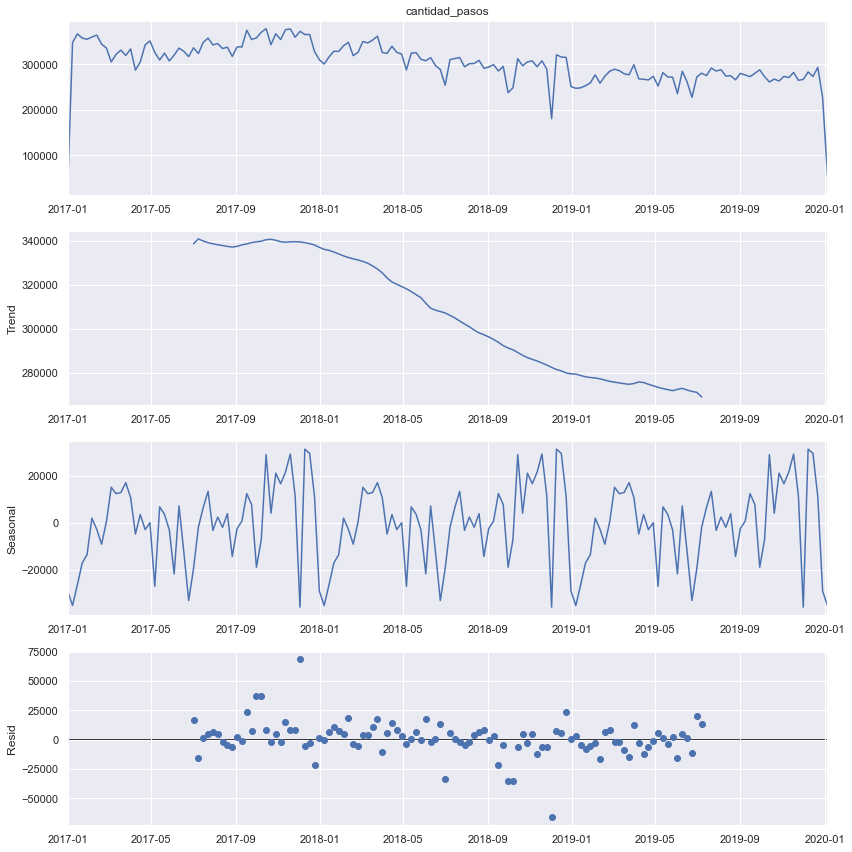

In [28]:
plt.figure(figsize=(12,12))
semanal.plot()
plt.show()

#### Esto nos lleva a preguntar el porque de esa tendencia. Se cambio la forma de pago ?

In [29]:
data_pago = pd.concat([data_2019, data_2018, data_2017])
data_pago = data_pago[data_pago.estacion=='Illia']
data_pago.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
data_pago.head(1)

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,146


In [30]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_pago['fecha2'] = pd.to_datetime(data_pago.fecha) + pd.to_timedelta(data_pago.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_pago.drop(columns=['fecha','hora_fin'], inplace = True)

data_pago.head()

#Corregimos el nombre de fecha2 a fecha
data_pago.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_pago.head(1)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
19,Martes,Centro,Liviano,146,2019-01-01 01:00:00


In [31]:
#Reordenamos el dataset por fecha
data_pago.sort_values('fecha', inplace = True)
data_pago.reset_index(drop=True, inplace = True)
data_pago.head(2)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Liviano,459,2017-01-01
1,Domingo,Provincia,Pesado,3,2017-01-01


#### Realizamos las mismas modificaciones que le realizamos al primer dataset.

<Figure size 864x864 with 0 Axes>

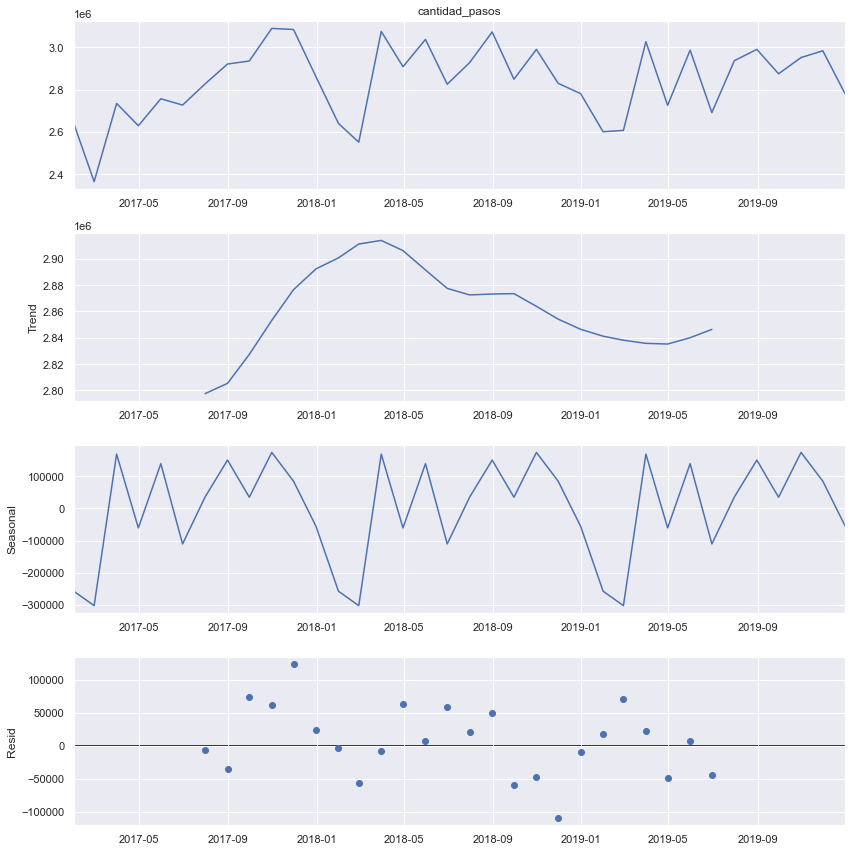

In [32]:
data_pago_mes = data_pago.resample('M', on = 'fecha').sum()
data_pago_mes = seasonal_decompose(data_pago_mes.cantidad_pasos, model='additive')
plt.figure(figsize=(12,12))
data_pago_mes.plot()
plt.show()

##### Vemos que tenemos una tendencia de crecimiento al comienzo pero luego se convierte en decrecimiento a principios de 2018 y continua descreciendo hasta hoy en dia. Asi que podemos afirmar que el peaje Illia tiene un crecimiento negativo o mejor dicho decrecimiento, es decir que cada dia disminuye la cantidad de pasos. Se puede observar un tendencia de crecimiento al final esto puede deberse a la implementacion de "Autopistas sin barreras" implmentadas en dicho año y a la obligatoriedad del tele pase

## Prediccion

#### Para esta estapa voy a ralizar un proceso de limpieza de outliers y encodeados de los features

##### Encodeado

In [33]:
df = dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


In [34]:
df

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [35]:
columns= ['dia','sentido','tipo_vehiculo']
for x in columns: 
    tipos=df[x]
    tipos_coded= pd.get_dummies(tipos, columns=[x])
    df = df.join(tipos_coded)

In [36]:
df.head(2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dia             2 non-null      object        
 1   sentido         2 non-null      object        
 2   tipo_vehiculo   2 non-null      object        
 3   cantidad_pasos  2 non-null      int64         
 4   fecha           2 non-null      datetime64[ns]
 5   Domingo         2 non-null      uint8         
 6   Jueves          2 non-null      uint8         
 7   Lunes           2 non-null      uint8         
 8   Martes          2 non-null      uint8         
 9   Miércoles       2 non-null      uint8         
 10  Sábado          2 non-null      uint8         
 11  Viernes         2 non-null      uint8         
 12  Centro          2 non-null      uint8         
 13  Provincia       2 non-null      uint8         
 14  Liviano         2 non-null      uint8         
 15  Pesado    

##### Limpieza de outliers

In [37]:
Q1 = df.cantidad_pasos.quantile(0.25)
Q3 = df.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1
df=df[~((df.cantidad_pasos < (Q1 - 1.5 * IQR)) |(df.cantidad_pasos > (Q3 + 1.5 * IQR)))]
df.shape

(192654, 16)

##### Si bien no existen nulos, lo siguiente se hace al solo hecho teorico

In [38]:
print(df.isna().sum())
diario = df.interpolate()
print(df.isna().sum())

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
Domingo           0
Jueves            0
Lunes             0
Martes            0
Miércoles         0
Sábado            0
Viernes           0
Centro            0
Provincia         0
Liviano           0
Pesado            0
dtype: int64
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
Domingo           0
Jueves            0
Lunes             0
Martes            0
Miércoles         0
Sábado            0
Viernes           0
Centro            0
Provincia         0
Liviano           0
Pesado            0
dtype: int64


In [39]:
df.head(2)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Centro,Provincia,Liviano,Pesado
0,Domingo,Provincia,Pesado,1,2017-01-01,1,0,0,0,0,0,0,0,1,0,1
1,Domingo,Provincia,Liviano,9,2017-01-01,1,0,0,0,0,0,0,0,1,1,0


In [40]:
df_diario = df.resample('D', on = 'fecha').sum()
print(df_diario.shape)
df_diario.head()

(1095, 12)


,cantidad_pasos,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Centro,Provincia,Liviano,Pesado
fecha,,,,,,,,,,,,
2017-01-01,2925,192.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,86.0,55.0,137.0
2017-01-02,7819,0.0,0.0,273.0,0.0,0.0,0.0,0.0,165.0,108.0,54.0,219.0
2017-01-03,7151,0.0,0.0,0.0,267.0,0.0,0.0,0.0,159.0,108.0,56.0,211.0
2017-01-04,8303,0.0,0.0,0.0,0.0,280.0,0.0,0.0,170.0,110.0,55.0,225.0
2017-01-05,8314,0.0,275.0,0.0,0.0,0.0,0.0,0.0,171.0,104.0,53.0,222.0


##### Implemento Autocorrelación con statsmodels.

In [41]:
from statsmodels.tsa.stattools import acf
nlags =  70
autocorr = acf(df_diario.cantidad_pasos, nlags = nlags)

C:\Users\ijgv\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


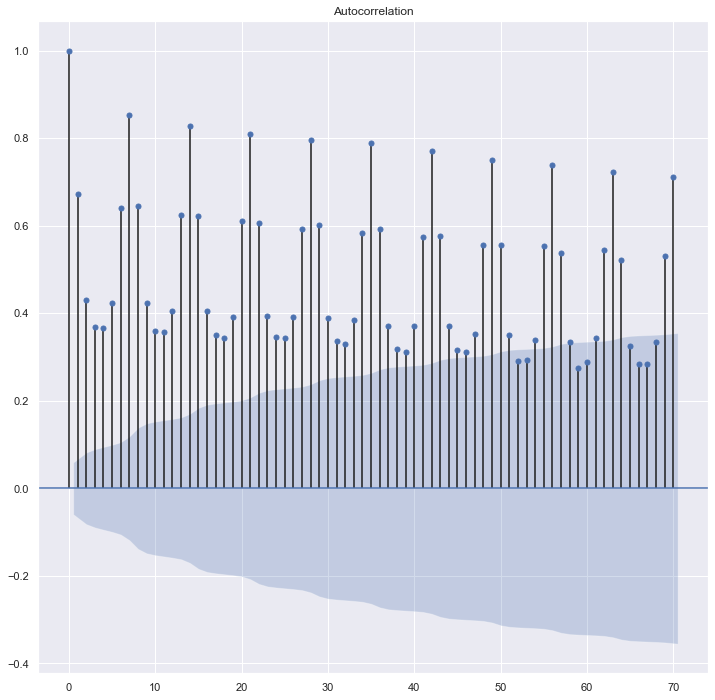

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diario.cantidad_pasos, lags = nlags)
plt.show()

In [43]:
import random as rd
rd.seed(7)

ONE STEP PREDICTION

In [44]:
one = df_diario.copy()
one = one.cantidad_pasos
one.head()

fecha
2017-01-01    2925
2017-01-02    7819
2017-01-03    7151
2017-01-04    8303
2017-01-05    8314
Freq: D, Name: cantidad_pasos, dtype: int64

In [45]:
one.shape

(1095,)

##### Defino cuántos valores *hacia atras* tomare

In [46]:
look_back = 52 
N = one.shape[0]

In [47]:
N = one.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1042, 52) (1042,)


Defino X e Y

In [48]:
for i in range(X.shape[0]):
    X[i,:] = one.iloc[i:i+look_back]
    y[i] = one.iloc[i+look_back]

##### Train Test Slip

In [49]:
N_train = 3*52 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*52 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(104, 52) (104,)
(52, 52) (52,)


Vamos a ultizar random forest regressor

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [52]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

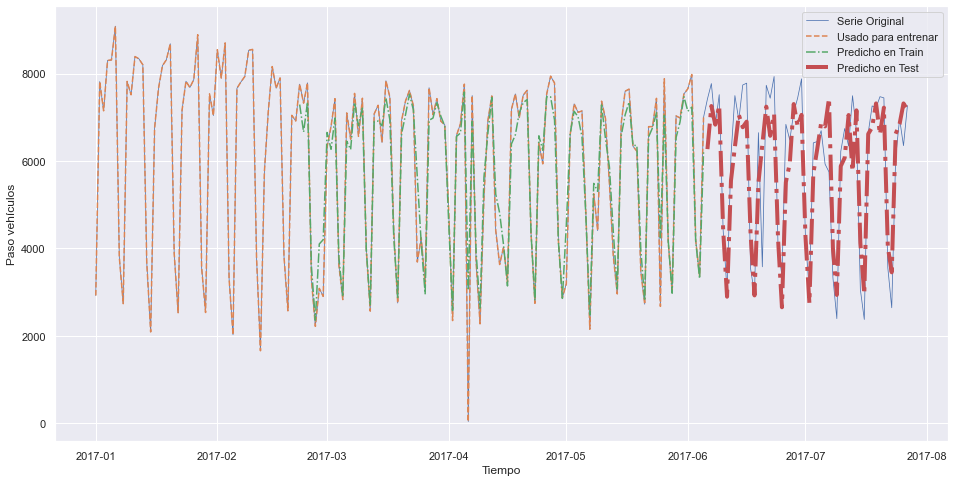

In [53]:
plt.figure(figsize=(16,8))
plt.plot(one.index[:length_total], one[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(one.index[:N_train + look_back], one[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(one.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(one.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos')
plt.show()

Vamos a evaluar el modelo con el RMSE

In [54]:
RMSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(RMSE))

RMSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(RMSE))

Error en Train: 578.3156251422348
Error en Test: 810.6697861182444


Benchmark: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [55]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

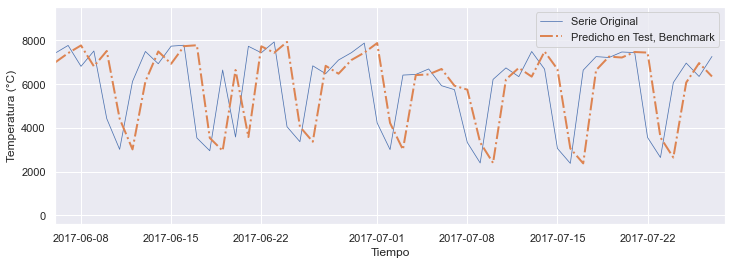

In [56]:
plt.figure(figsize=(12,4))
plt.plot(one.index[:length_total], one[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(one.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(one.index[N_train+look_back], one.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [57]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
RMSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(RMSE))

2085.589526507295


Como se puede observar nuestro modelo es considerablemente mejor que el bechmark.

Para comparar con otro modelo/forma y no quedarnos solo con una respuesta vamos a realizar multi step prediction

*MULTI STEP PREDICTION*

In [58]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [59]:
RMSE2 = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(RMSE2))

Error en Test: 761.8999090078393


#### Que nos quiere decir este resultado, significa que del valor esperado o del valor predicho este puede variar en + - 761 cantidad de pasos en este caso.

##### Que modelo es mejor ?

In [60]:
Diferencia_de_rendimiento = (810.6697861182444-761.8999090078393)/810.6697861182444*100
print(Diferencia_de_rendimiento)

6.015997875526044


Si evaluamos segun RMSE vemos que el proceso de Multi Step Prediction mejora aun mas nuestro modelo por lo que decido optar por dicho modelo.

##### En caso de que queramos usar los mismos datos y modelo pero con distintas variables solo basta con aplicar un subset de la variable al dataframe df y realizar los mismos paso. A continuacion dejo un ejemplo.

##### La metodogia a aplicar es siempre la misma. Siempre y cuando queramos saber la cantidad de pasos teniendo en cuenta alguna variable en particular

###### Si quisieramos estimar la cantidad de pasos pero solo de vehiculos livianos ? (Podria ser algunas de las preguntas)

In [61]:
df.head(2)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Centro,Provincia,Liviano,Pesado
0,Domingo,Provincia,Pesado,1,2017-01-01,1,0,0,0,0,0,0,0,1,0,1
1,Domingo,Provincia,Liviano,9,2017-01-01,1,0,0,0,0,0,0,0,1,1,0


In [62]:
df_obs = df.copy()

In [63]:
df_obs = df_obs[df_obs.tipo_vehiculo == "Liviano"] # Subset de la varieble elegida

In [64]:
# Implementacion para distintas variables

df_obs_diario = df_obs.resample('D', on = 'fecha').sum()


df_obs_diario = df_obs_diario.cantidad_pasos

look_back = 52 
N = df_obs_diario.shape[0]

N = df_obs_diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)


for i in range(X.shape[0]):
    X[i,:] = df_obs_diario.iloc[i:i+look_back]
    y[i] = df_obs_diario.iloc[i+look_back]

N_train = 3*52 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*52 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]


X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]


from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

print('One Step Prediction')
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

RMSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(RMSE))

RMSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(RMSE))


print('Multi Step Prediction')
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)


RMSE_test2 = mean_squared_error(y_test, y_ms_test_pred)

print('Error en Test:',np.sqrt(RMSE_test2))

One Step Prediction
Error en Train: 440.2486030522108
Error en Test: 749.0396365244068
Multi Step Prediction
Error en Test: 767.7720634482205


En este caso podemos ver que con el metodo one step prediction obtenemos un mejor resultado.

### Investigacion

En un principio aplicaria directamente una libreria especifica de series de tiempo como Prophet, se podrian explotar mucho mas los datos y obtener mejores conclusiones.

Luego implementaria mas features como sentido, dia, tipo de vehiculo, etcetera y mas años.

Tambien agregaría mas formas de pago, no solo efectivo ya que tieniendo en cuenta la tecnologia, tanto para las casillas de pejae tradicionales como para el metodo de pago han ido evolucionando y mutando.

Vamos a ver un ejemplo de la estacion Illia con todos los metodos de pago y diferenciado vehiculos livianos de pesados

In [65]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_1 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_1 = (dataset_1.estacion=='Illia')
dataset_1 = dataset_1[mask_1]

#Quitamos las columnas que no vamos a utilizar
dataset_1.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_1.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,146
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
22,2019-01-01,1,Martes,Provincia,Liviano,147
23,2019-01-01,1,Martes,Provincia,Liviano,106


In [66]:
df_liviano = dataset_1.copy()
df_pesados = dataset_1.copy()

In [67]:
df_liviano = df_liviano[df_liviano.tipo_vehiculo == "Liviano"] # Subset de la varieble elegida
df_pesados = df_pesados[df_pesados.tipo_vehiculo == 'Pesado']

In [68]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
df_liviano['fecha2'] = pd.to_datetime(df_liviano.fecha) + pd.to_timedelta(df_liviano.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
df_liviano.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha

df_liviano.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df_liviano.head(2)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
19,Martes,Centro,Liviano,146,2019-01-01 01:00:00
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00


In [69]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
df_pesados['fecha2'] = pd.to_datetime(df_pesados.fecha) + pd.to_timedelta(df_pesados.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
df_pesados.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha

df_pesados.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df_pesados.head(2)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
24,Martes,Provincia,Pesado,3,2019-01-01 01:00:00


In [70]:
df_liviano_diario = df_liviano.resample('D', on = 'fecha').sum()
print(df_liviano_diario.shape)

(1095, 1)


In [71]:
df_pesados_diario = df_pesados.resample('D', on = 'fecha').sum()
print(df_pesados_diario.shape)

(1095, 1)


Componentes de la serie

In [72]:
ventana = int(365*5/7)
diario_promedio_tendencia_liviano = df_liviano_diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia_liviano

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

In [73]:
ventana = int(365*5/7)
diario_promedio_tendencia_pesados = df_pesados_diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia_pesados

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

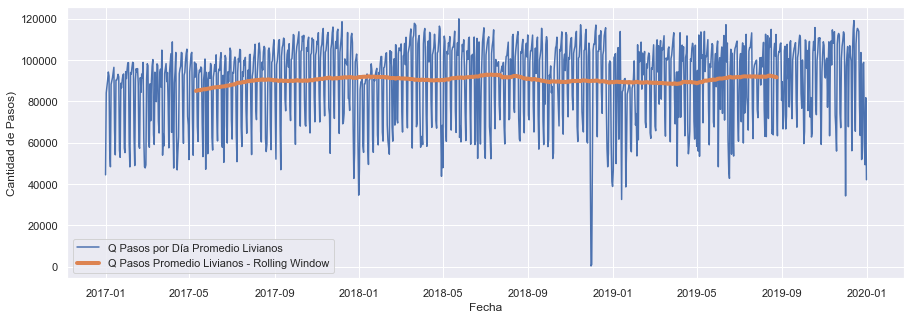

In [74]:
plt.figure(figsize = (15,5))
plt.plot(df_liviano_diario.index, df_liviano_diario.cantidad_pasos, label = 'Q Pasos por Día Promedio Livianos')
plt.plot(diario_promedio_tendencia_liviano, lw = 4, label = 'Q Pasos Promedio Livianos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos)')
plt.legend()
plt.show()

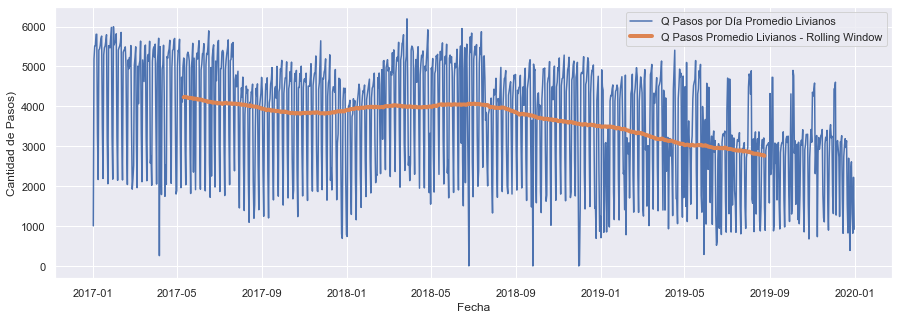

In [75]:
plt.figure(figsize = (15,5))
plt.plot(df_pesados_diario.index, df_pesados_diario.cantidad_pasos, label = 'Q Pasos por Día Promedio Livianos')
plt.plot(diario_promedio_tendencia_pesados, lw = 4, label = 'Q Pasos Promedio Livianos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos)')
plt.legend()
plt.show()

Descomposicion de las series

In [76]:
result_1 = seasonal_decompose(df_liviano_diario.cantidad_pasos, model='additive')

In [77]:
result_2 = seasonal_decompose(df_pesados_diario.cantidad_pasos, model='additive')

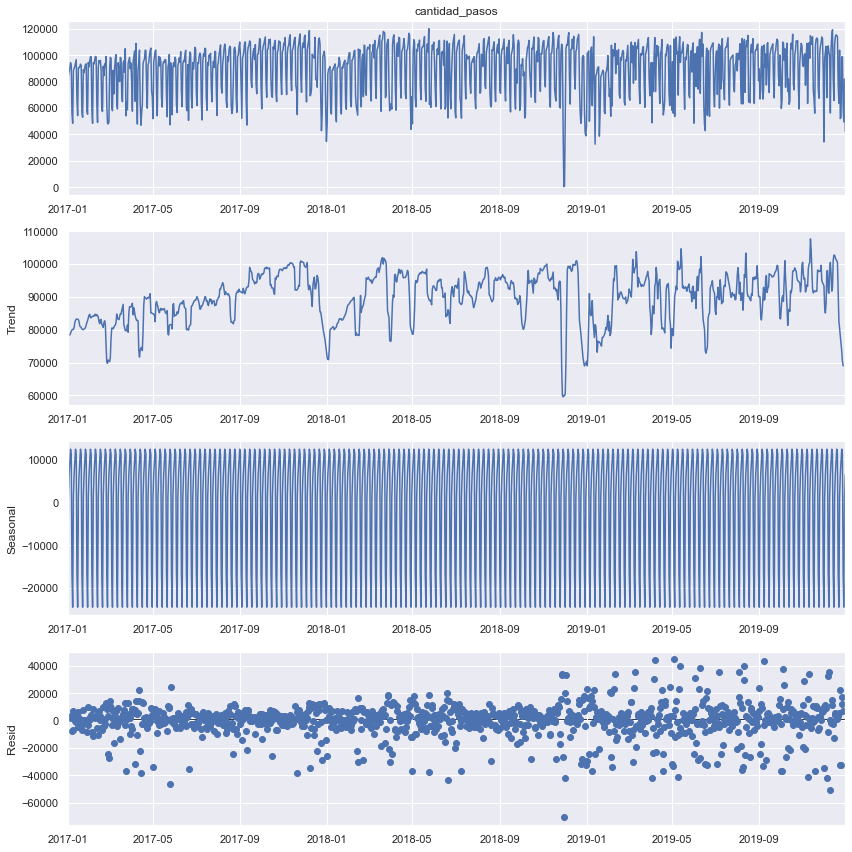

In [78]:
plt.rcParams['figure.figsize'] = [12,12]
result_1.plot()
plt.show()

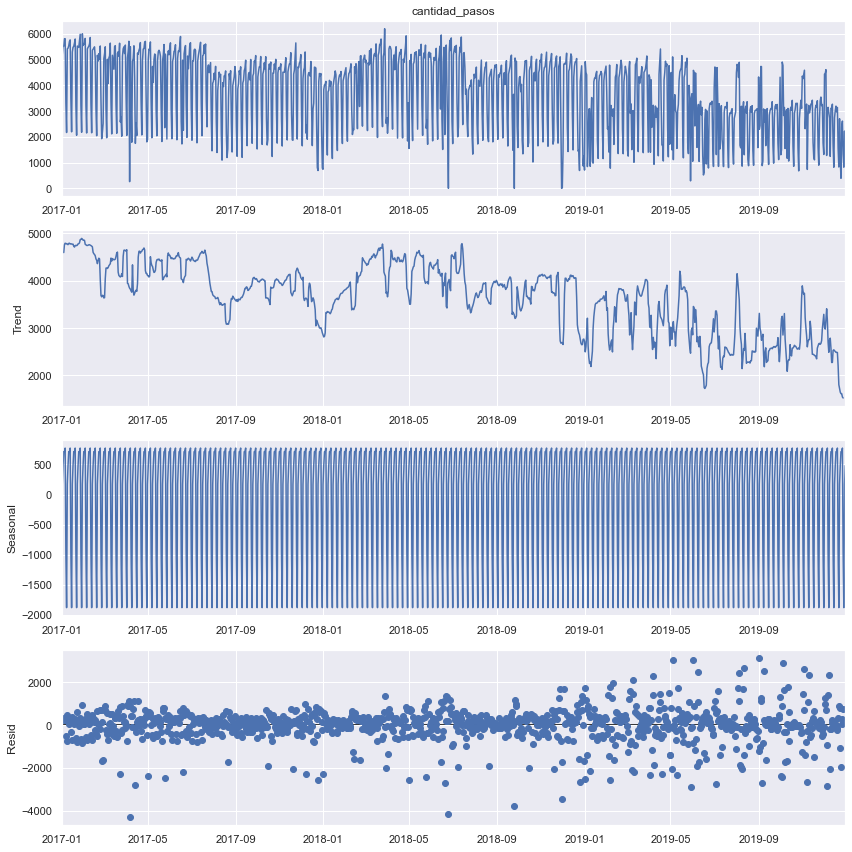

In [79]:
plt.rcParams['figure.figsize'] = [12,12]
result_2.plot()
plt.show()

En en el caso de los vehiculos livianos vemos claramente la diferencia de tendencia si se tienen en cuenta todas las formas de pago, nuestras conclsuiones iniciales que indicaban que dicha estacion se estaba dejando de usar serian erroneas

Respecto de los vehiculos pesados si se puede seguir observando a un mas la tendencia negativa, si bien puede deberse a la construccion del paseo del bajo y el cambio de recorrido de dicho tipo de vehiculo hay algo mas que esta haciendo que cada vez se use menos esta estacion para ese tipo de vehiculo

Para el siguiente desarrollo tendria muy encuenta el tipo de vehiculo a la hora de usar los modelos, lo haria por separado para obtener mejores resultados en cuanto a las predicciones y poder desarrollar mejores conclusiones finales.